# Pymaceuticals Observations

1. Mice treated with the Infubinol and Ceftamin regimens had significantly larger final tumor volumes compared to mice treated with the Ramicane and Capomulin regimens. Those treated with Infubinol and Ceftamin had a final average tumor volume of about 60mm3 while those treated with Ramicane and Capomulin had a final average tumor volume of about 37mm3. 

2. There is a high correlation between mouse weight and average tumor volume (.84). So, the more a mouse weighs, the larger their tumor is going to be (typically speaking, this observation does not hold true for every mouse but does for most).

3. The single mouse we looked at for the Capomulin regimen is below the lower quartile and the tumor seems to have responded well to the treatment. The mouse ended with a tumor size of under 25mm3 and the lower quartile end at around 32mm3 for this regimen. 

4. Some final thoughts: The sample was pretty even between male and female mice tested but we did not do any observations on how well males responded vs females to different regimens. It would also be interesting to look at age data. How do older vs younger mice respond to treatment? 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")


# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Check the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [18]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [19]:
# Drop any duplicate rows
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Recheck the number of mice
cleaned_df["Mouse ID"].nunique()

249

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen.

regimen = cleaned_df.groupby(["Drug Regimen"])

tumors = regimen["Tumor Volume (mm3)"]

tumor_mean = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2)
tumor_median = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),2)
tumor_var = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),2)
tumor_sd = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),2)
sem = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),2)


stats_df = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_sd, sem], axis=1)

cols = []
count = 1
for column in stats_df.columns:
    if column == "Tumor Volume (mm3)":
        cols.append(f"Tumor Volume (mm3)_{count}")
        count+=1
        continue
    cols.append(column)
stats_df.columns = cols

summary_stats_df = stats_df.rename(columns={
    "Tumor Volume (mm3)_1":"Mean", 
    "Tumor Volume (mm3)_2":"Median", 
    "Tumor Volume (mm3)_3": "Variance",
    "Tumor Volume (mm3)_4": "Std Dev",
    "Tumor Volume (mm3)_5": "SEM"})

summary_stats_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

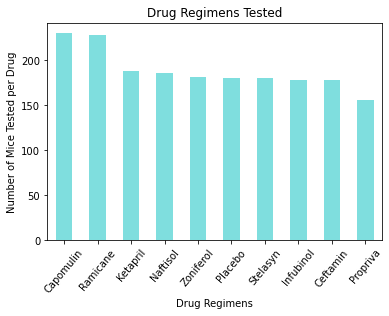

In [32]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

drug_regimen = cleaned_df["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar", color='c', alpha=0.5, align='center')

plt.xticks(rotation=50)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per Drug")

plt.savefig('Drug_Regimens_Bar_Chart.png')

plt.show()

Text(0, 0.5, 'Number of Mice Tested per Drug')

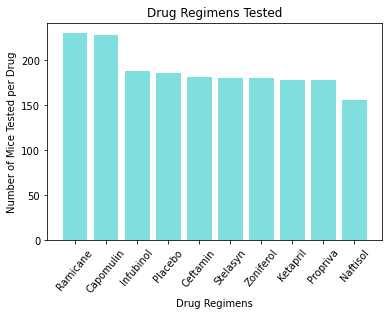

In [33]:
# Generate identical bar plot using pyplot instead of pandas.

drug_regimen = cleaned_df["Drug Regimen"].value_counts()
x_axis = cleaned_df["Drug Regimen"].unique()

plt.bar(x_axis, drug_regimen, color='c', alpha=0.5, align='center')

plt.xticks(rotation=50)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per Drug")

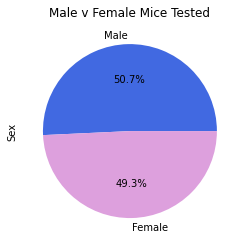

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_data = cleaned_df["Sex"].value_counts()
colors = ["royalblue", "plum"]
labels = cleaned_df["Sex"].unique()


mouse_data.plot(kind="pie", labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male v Female Mice Tested")

plt.savefig('Male_v_Female_Mice_Tested.png')

plt.show()

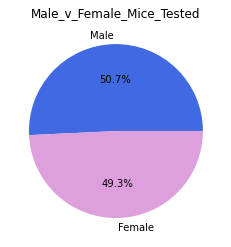

In [37]:
# Generate identical pie plot using pyplot

mouse_data = cleaned_df["Sex"].value_counts()
colors = ["royalblue", "plum"]
labels = cleaned_df["Sex"].unique()


plt.pie(mouse_data, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male_v_Female_Mice_Tested")

plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_id = cleaned_df.groupby("Mouse ID")
timepoint = mouse_id["Timepoint"].max()

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

timepoint_df = timepoint.to_frame().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(timepoint_df, cleaned_df, on=["Mouse ID","Timepoint"])[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Placebo,70.717621
3,Ceftamin,62.999356
4,Stelasyn,63.440686
...,...,...
244,Propriva,48.710661
245,Ramicane,30.638696
246,Infubinol,62.754451
247,Naftisol,65.741070


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [45]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

drug_types = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_volume = []

for drug in drug_types:
    volume_drug = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    quartiles = volume_drug.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq ,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    drug_volume.append(volume_drug)
    
    print(f"{drug}")
    print(f"-----------------------")
    print(f"The lower quartile is {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The interquartile is {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"                       ")
    print(f"                       ")
    

Capomulin
-----------------------
The lower quartile is 32.38
The upper quartile is 40.16
The interquartile is 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
                       
                       
Ramicane
-----------------------
The lower quartile is 31.56
The upper quartile is 40.66
The interquartile is 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
                       
                       
Infubinol
-----------------------
The lower quartile is 54.05
The upper quartile is 65.53
The interquartile is 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
                       
                       
Ceftamin
-----------------------
The lower quartile is 48.72
The upper quartile is 64.3
The interquartile is 15.58
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
                       
                       


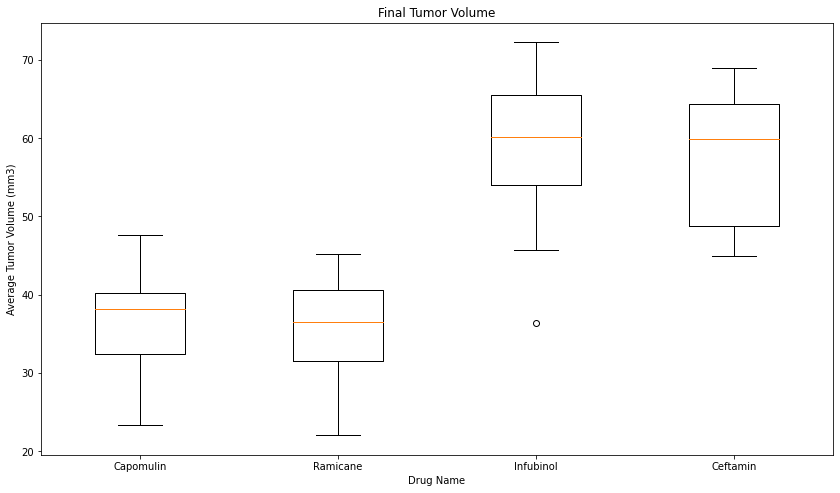

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

box_plot = plt.figure(figsize =(11,6))

ax = box_plot.add_axes([0, 0, 1, 1])
bp = ax.boxplot(drug_volume, labels = drug_types)
plt.title("Final Tumor Volume")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Drug Name")

plt.savefig('Tumor_Volume_Box_Plot.png')

plt.show()


## Line and Scatter Plots

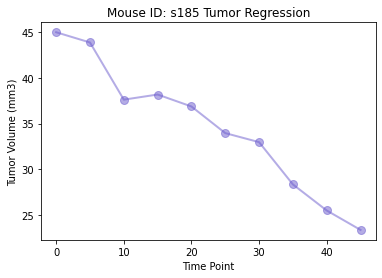

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

capomulin_mouse = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]["Mouse ID"]
capomulin_mouse = capomulin_mouse[10]

line_plot = cleaned_df.loc[cleaned_df["Mouse ID"] == capomulin_mouse]

timepoint = line_plot["Timepoint"]
tumor = line_plot["Tumor Volume (mm3)"]
               
plt.plot(timepoint, tumor, marker = "o", color = "slateblue", alpha = 0.5, markersize=8, linewidth=2)
plt.title("Mouse ID: " + capomulin_mouse + " Tumor Regression")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('Capomulin_Mouse_Volume_v_Time.png')

plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

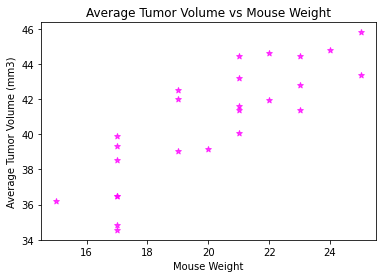

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

tumor_volume = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

mouse_group = tumor_volume.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

x_axis = mouse_group["Weight (g)"]
y_axis = mouse_group["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="*", facecolors="magenta", edgecolors="magenta", alpha=.75)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

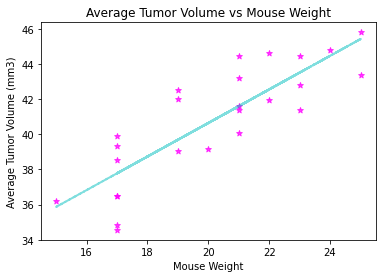

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = mouse_group["Weight (g)"]
y_axis = mouse_group["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", facecolors="magenta", edgecolors="magenta", alpha=.75)
plt.plot(x_axis,regress_values,"r-", alpha=.50, linestyle='-.', linewidth=2, color = 'c')
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")


plt.savefig('Average_Tumor_Volume_Scatter_Plot.png')
plt.show()

print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_axis,y_axis)[0],2)}")